In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/AnalysisTreesInformation/AnaTreesPackage/notebooks/')
from notebooks_tools import * 
%matplotlib inline

In [120]:
MCC8extBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MCC8_extBNB_AnalysisTrees.csv')
MCC8extBNB.fillna(-100,inplace=True)

# MCC-8 extBNB plots

In [127]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

def add_retreat_label(xtext=None,ytext=None):
    label = 'cohen.erez7@gmail.com, mini-retreat (Feb-2017)'
    if xtext is not None and ytext is not None:
        plt.text(xtext,ytext,label)
    else:
        plt.figtext(0.1,0.05,label)

In [129]:
def plot_errorbar_histogram(data=MCC8extBNB , data_name = 'MCC8-extBNB, contained pandoraCosmic tracks',
                            var='startx' , 
                            x_label = '$x_{start}$ [cm]', y_label='counts',
                            bins=50,  figsize=(16,10) , ticks_color='black',
                            do_add_retreat_label=True,do_save_fig=True):
    
    ax , h , bins , mid = hist_with_errors( data[var] , bins=bins, figsize=figsize)
    set_axes(ax=ax, x_label=x_label,y_label=y_label, ticks_color=ticks_color)
    ax.set_title(data_name,fontsize=25,y=1.02)
    ax.set_xlim(bins.min(),bins.max())
    if do_add_retreat_label: 
        add_retreat_label()
    if do_save_fig:
        plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_%s.pdf'%(namestr(data, globals()),var))

In [91]:
def plot_2d_histogram(data=MCC8extBNB , data_name = 'MCC8-extBNB, contained pandoraCosmic tracks',
                      varx='startx' , vary='starty' , mul_x=1, mul_y=1,
                      x_label = '$x_{start}$ [cm]', y_label='$y_{start}$ [cm]',
                      cmap='hot_r',norm='normal',
                      binsx=50, binsy=50,  figsize=(16,10) , ticks_color='black', fontsize=25,
                      do_add_retreat_label=True,do_save_fig=True):
    
    plot2d = plot_2d_hist( mul_x*data[varx] , mul_y*data[vary] , 
                 bins=(binsx,binsy) , cmap=cmap,
                 xlabel=x_label , ylabel=y_label, norm=norm,
                 figsize=figsize , fontsize=fontsize , ticks_color=ticks_color);
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=fontsize,labelcolor=ticks_color)

    counts, xedges, yedges, Image, ax = plot2d 
    ax.set_title(data_name,fontsize=25,y=1.02)


    if do_add_retreat_label: 
        add_retreat_label()
    if do_save_fig:
        plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_%s_vs_%s.pdf'%(namestr(data, globals()),varx,vary))

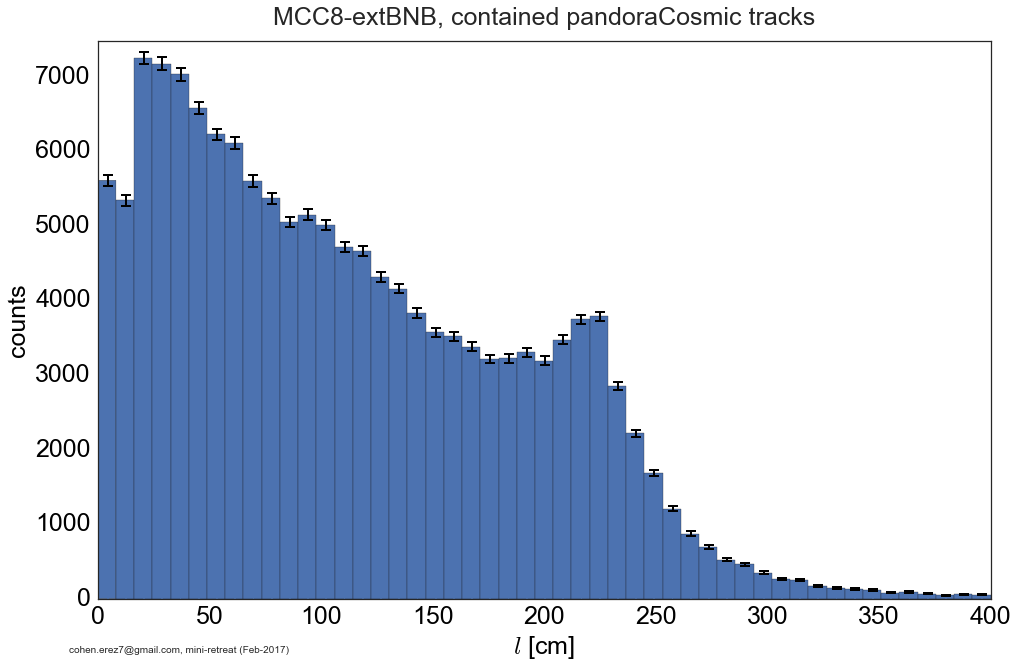

In [130]:
plot_errorbar_histogram(data=MCC8extBNB ,var='length' , x_label = '$l$ [cm]', 
                            bins=np.linspace(-0.1,400,50))

(0, 1.05)

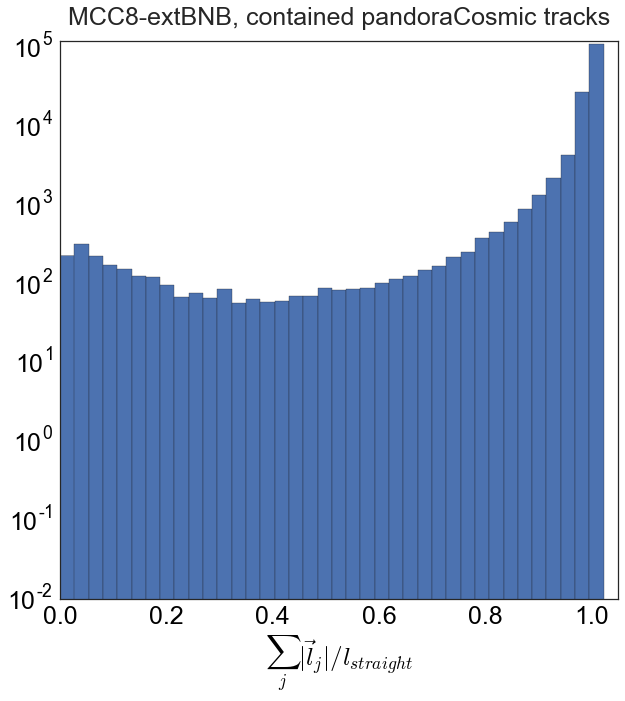

In [144]:
ax , h , bins , patches = plot_1d_hist(MCC8extBNB[MCC8extBNB.distlenratio>-1]['distlenratio'] , xlabel='$\\sum_j |\\vec{l}_j| / l_{straight}$', 
                            bins=np.linspace(0,1.05,40));
ax.set_ylim(0.01,1.1*np.max(h))
ax.set_title('MCC8-extBNB, contained pandoraCosmic tracks',y=1.02,fontsize=25)
ax.set_yscale('log')
ax.set_xlim(0,1.05)

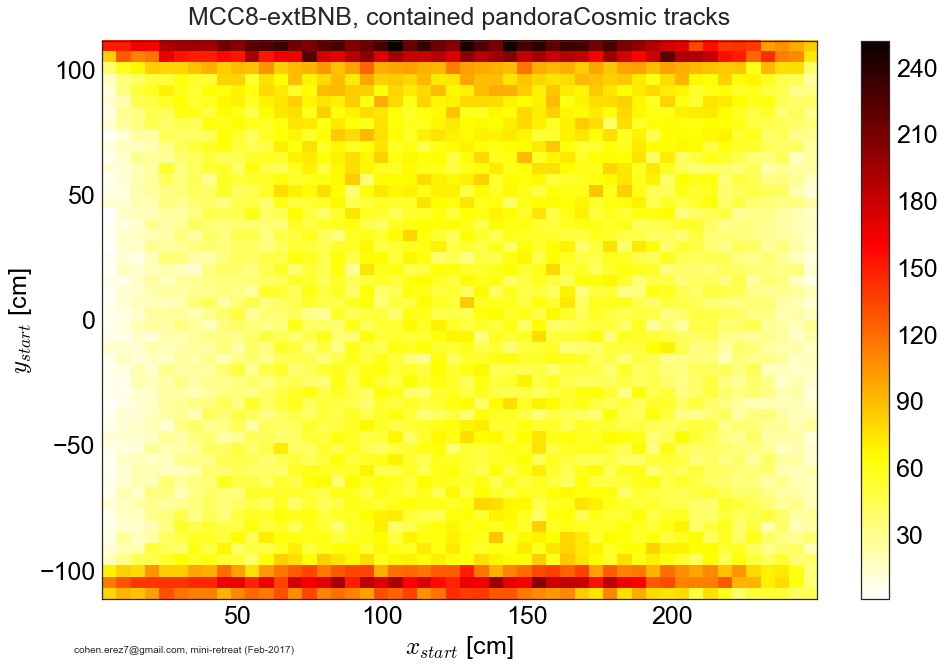

In [145]:
plot_2d_histogram(data=MCC8extBNB , varx='startx' , vary='starty' ,                      
                  x_label = '$x_{start}$ [cm]', y_label='$y_{start}$ [cm]',
                  binsx=50, binsy=50,                   
                  )

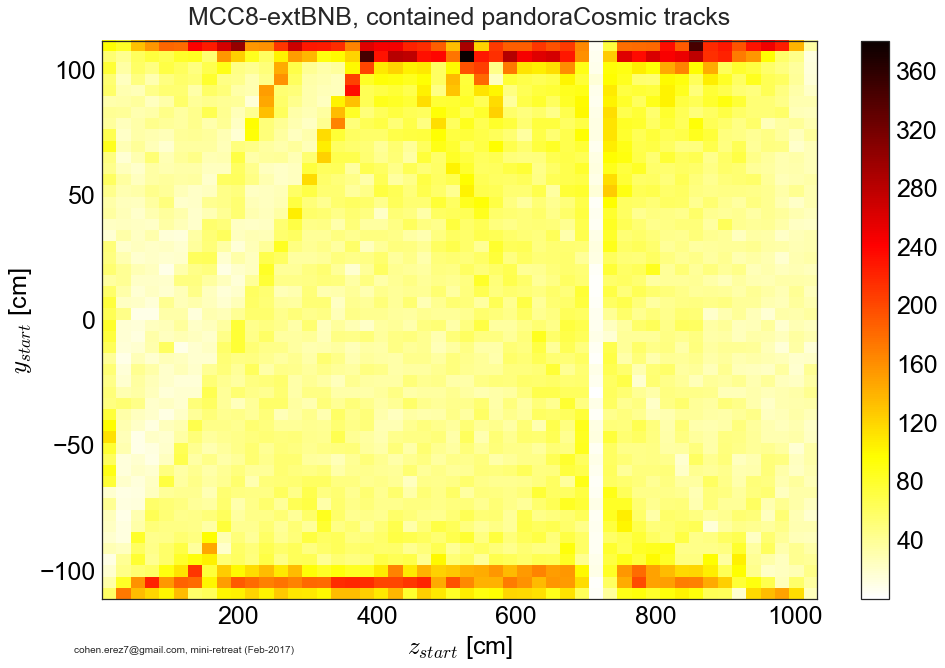

In [146]:
plot_2d_histogram(data=MCC8extBNB , varx='startz' , vary='starty' ,                      
                  x_label = '$z_{start}$ [cm]', y_label='$y_{start}$ [cm]',
                  binsx=50, binsy=50,                   
                  )

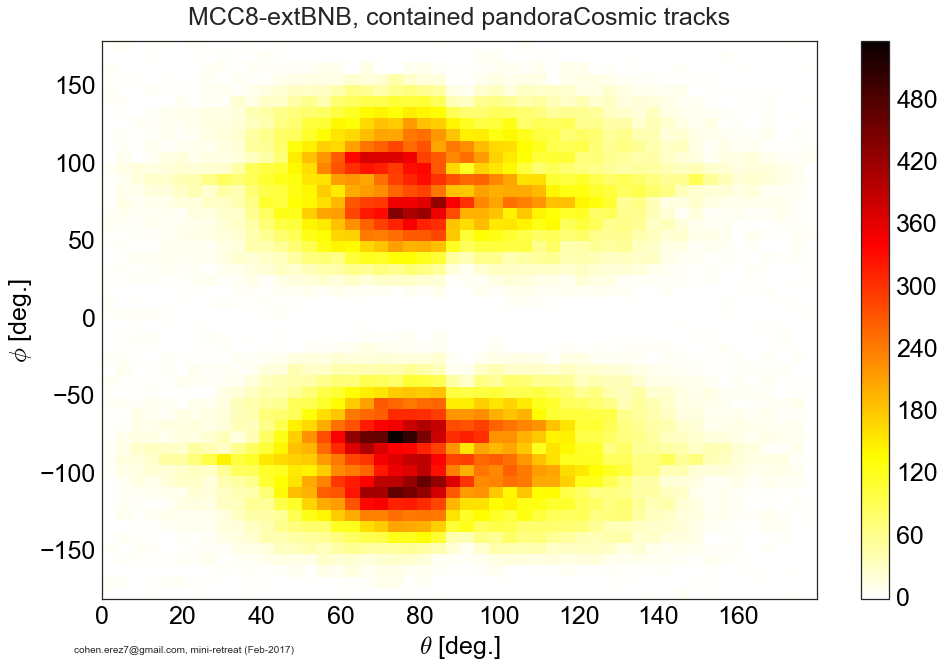

In [147]:
plot_2d_histogram(data=MCC8extBNB , varx='theta' , vary='phi' , mul_x=180./np.pi , mul_y=180./np.pi,
                  x_label = '$\\theta$ [deg.]', y_label='$\\phi$ [deg.]',
                  binsx=50, binsy=50,                   
                  )